In [16]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# load the sales calls
calls = pd.read_csv("data/sales_calls.csv")
print(calls)

   Team member  Territory  Month  Calls
0        Jorge          3      1    107
1        Jorge          3      2     88
2        Jorge          3      3     84
3        Jorge          3      4    113
4          Ana          1      1     91
5          Ana          1      2    129
6          Ana          1      3     96
7          Ana          1      4    128
8          Ali          2      1    120
9          Ali          2      2     85
10         Ali          2      3     87
11         Ali          2      4     87


In [5]:
# load the sales revenue
revenue = pd.read_csv("data/sales_revenue.csv")
print(revenue)

    Territory  Month  Amount
0           1      1   54228
1           1      2   61640
2           1      3   43491
3           1      4   52173
4           2      1   36061
5           2      2   44957
6           2      3   35058
7           2      4   33855
8           3      1   50876
9           3      2   57682
10          3      3   53689
11          3      4   49173


In [6]:
# merge both files
calls_revenue = pd.merge(calls, revenue, on=['Territory', 'Month'])
print(calls_revenue)

   Team member  Territory  Month  Calls  Amount
0        Jorge          3      1    107   50876
1        Jorge          3      2     88   57682
2        Jorge          3      3     84   53689
3        Jorge          3      4    113   49173
4          Ana          1      1     91   54228
5          Ana          1      2    129   61640
6          Ana          1      3     96   43491
7          Ana          1      4    128   52173
8          Ali          2      1    120   36061
9          Ali          2      2     85   44957
10         Ali          2      3     87   35058
11         Ali          2      4     87   33855


In [7]:
# select records for Territory=3
print(calls_revenue[calls_revenue.Territory==3])

  Team member  Territory  Month  Calls  Amount
0       Jorge          3      1    107   50876
1       Jorge          3      2     88   57682
2       Jorge          3      3     84   53689
3       Jorge          3      4    113   49173


In [8]:
# TRY: select records for Ali
print(calls_revenue[calls_revenue['Team member']=='Ali'])

   Team member  Territory  Month  Calls  Amount
8          Ali          2      1    120   36061
9          Ali          2      2     85   44957
10         Ali          2      3     87   35058
11         Ali          2      4     87   33855


In [9]:
# TRY: select records in which amount per call is greater than 500
print(calls_revenue[calls_revenue.Amount/calls_revenue.Calls > 500])

  Team member  Territory  Month  Calls  Amount
1       Jorge          3      2     88   57682
2       Jorge          3      3     84   53689
4         Ana          1      1     91   54228
9         Ali          2      2     85   44957


In [10]:
# calculate the amount per call and store in a new column
calls_revenue['Call_Amount'] = calls_revenue.Amount/calls_revenue.Calls
print(calls_revenue)

   Team member  Territory  Month  Calls  Amount  Call_Amount
0        Jorge          3      1    107   50876   475.476636
1        Jorge          3      2     88   57682   655.477273
2        Jorge          3      3     84   53689   639.154762
3        Jorge          3      4    113   49173   435.159292
4          Ana          1      1     91   54228   595.912088
5          Ana          1      2    129   61640   477.829457
6          Ana          1      3     96   43491   453.031250
7          Ana          1      4    128   52173   407.601562
8          Ali          2      1    120   36061   300.508333
9          Ali          2      2     85   44957   528.905882
10         Ali          2      3     87   35058   402.965517
11         Ali          2      4     87   33855   389.137931


In [11]:
print(calls_revenue[calls_revenue.Amount/calls_revenue.Calls > 500])

  Team member  Territory  Month  Calls  Amount  Call_Amount
1       Jorge          3      2     88   57682   655.477273
2       Jorge          3      3     84   53689   639.154762
4         Ana          1      1     91   54228   595.912088
9         Ali          2      2     85   44957   528.905882


In [12]:
# get sum, mean, median, min, max
print(calls_revenue.Calls.sum())
print(calls_revenue.Calls.mean())
print(calls_revenue.Calls.median())
print(calls_revenue.Calls.min())
print(calls_revenue.Calls.max())
print(calls_revenue.describe())

1215
101.25
93.5
84
129
       Territory      Month       Calls        Amount  Call_Amount
count  12.000000  12.000000   12.000000     12.000000    12.000000
mean    2.000000   2.500000  101.250000  47740.250000   480.096665
std     0.852803   1.167748   17.279126   9129.881321   107.179540
min     1.000000   1.000000   84.000000  33855.000000   300.508333
25%     1.000000   1.750000   87.000000  41633.500000   406.442551
50%     2.000000   2.500000   93.500000  50024.500000   464.253943
75%     3.000000   3.250000  114.750000  53823.750000   545.657434
max     3.000000   4.000000  129.000000  61640.000000   655.477273


In [20]:
# TRY: select records with amount per calls above the median
print(calls_revenue[calls_revenue.Call_Amount >= calls_revenue.Call_Amount.median()])

  Team member  Territory  Month  Calls  Amount  Call_Amount
0       Jorge          3      1    107   50876   475.476636
1       Jorge          3      2     88   57682   655.477273
2       Jorge          3      3     84   53689   639.154762
4         Ana          1      1     91   54228   595.912088
5         Ana          1      2    129   61640   477.829457
9         Ali          2      2     85   44957   528.905882


In [21]:
# groupby Month
print(calls_revenue[["Month", "Calls", "Amount"]]
      .groupby(["Month"]).sum())

       Calls  Amount
Month               
1        318  141165
2        302  164279
3        267  132238
4        328  135201


In [179]:
# groupby Territory
print(calls_revenue[["Territory","Calls", "Amount"]]
      .groupby(["Territory"]).sum())

           Calls  Amount
Territory               
1            444  211532
2            379  149931
3            392  211420


In [25]:
print(calls_revenue[["Team member", "Calls", "Amount", "Month"]]
      .groupby(["Team member", "Month"]).sum())

                   Calls  Amount
Team member Month               
Ali         1        120   36061
            2         85   44957
            3         87   35058
            4         87   33855
Ana         1         91   54228
            2        129   61640
            3         96   43491
            4        128   52173
Jorge       1        107   50876
            2         88   57682
            3         84   53689
            4        113   49173


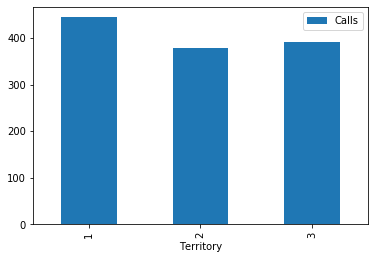

In [27]:
# use bar chart to display Calls per Territory
calls_revenue[['Territory', 'Calls']].groupby(['Territory']).sum().plot.bar()

In [172]:
# calculate calls per month for every team member
calls_month = calls_revenue[['Team member', 'Calls', 'Month']].groupby(['Team member','Month']).sum()
print(calls_month)

# get months
months = calls_revenue['Month'].unique()
print(months)

# get teams
teams = calls_revenue['Team member'].unique()
print(teams)

                   Calls
Team member Month       
Ali         1        120
            2         85
            3         87
            4         87
Ana         1         91
            2        129
            3         96
            4        128
Jorge       1        107
            2         88
            3         84
            4        113
[1 2 3 4]
['Jorge' 'Ana' 'Ali']


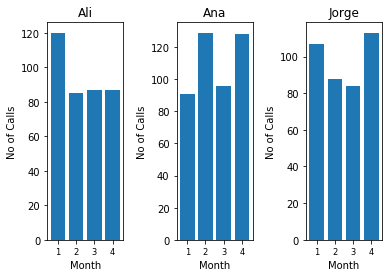

In [158]:
fig = plt.figure()
plt.subplots_adjust(wspace = 0.7, hspace = 0.7)

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.set_xticks([0, 1, 2, 3, 4])
ax2.set_xticks([0, 1, 2, 3, 4])
ax3.set_xticks([0, 1, 2, 3, 4])

ax1.set_xticklabels(months, rotation=0, fontsize='small')
ax2.set_xticklabels(months, rotation=0, fontsize='small')
ax3.set_xticklabels(months, rotation=0, fontsize='small')

ax1.bar(np.arange(len(calls_month['Calls']['Ali'])),
        calls_month['Calls']['Ali'])
ax2.bar(np.arange(len(calls_month['Calls']['Ana'])), 
        calls_month['Calls']['Ana'])
ax3.bar(np.arange(len(calls_month['Calls']['Jorge'])), 
        calls_month['Calls']['Jorge'])

ax1.set_title('Ali')
ax2.set_title('Ana')
ax3.set_title('Jorge')

ax1.set_xlabel('Month')
ax2.set_xlabel('Month')
ax3.set_xlabel('Month')

ax1.set_ylabel('No of Calls')
ax2.set_ylabel('No of Calls')
ax3.set_ylabel('No of Calls')

plt.show()

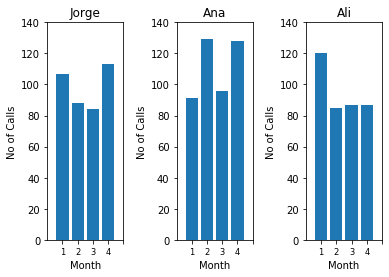

In [173]:
fig, axes = plt.subplots(1, 3, sharex=False, sharey=False)
plt.subplots_adjust(wspace=0.7, hspace=0.7)

for i in range(3) :
    axes[i].set_xticks([0, 1, 2, 3, 4])
    axes[i].set_xticklabels(mo nths, rotation=0, fontsize='small')
    axes[i].bar(np.arange(len(calls_month['Calls'][teams[i]])),calls_month['Calls'][teams[i]])
    axes[i].set_title(teams[i])
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('No of Calls')
    axes[i].set_xlim([-1, 4])
    axes[i].set_ylim(0, 140)